<a href="https://colab.research.google.com/github/Y-YHat/dexter_ai/blob/main/agent_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
requirements.txt
* langchain
* langchain-experimental
* youtube-search
* duckduckgo-search
* wikipedia
* langchain-community
* langchain-openai

```







In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!pip install -q -r '/content/drive/My Drive/requirements.txt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.6/983.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.8/355.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.1 MB

```
imports
```

In [4]:
import os
from langchain.utilities.tavily_search import TavilySearchAPIWrapper
from langchain.agents import initialize_agent, AgentType
from langchain_openai import ChatOpenAI
from langchain.tools.tavily_search import TavilySearchResults
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import YouTubeSearchTool
from langchain.agents import Tool
from langchain_experimental.utilities import PythonREPL
from langchain_community.tools import DuckDuckGoSearchRun
from langchain.agents import AgentExecutor
from langchain.agents.react.agent import create_react_agent
import pandas as pd
import numpy as np
import random
from math import comb
from IPython.display import Markdown
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from datetime import datetime, timedelta

In [5]:

from google.colab import userdata
import os

os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")

In [6]:
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

In [7]:
# set up the agent
llm = ChatOpenAI(model_name="gpt-4", max_tokens=500, temperature=0.7)

In [8]:
search = TavilySearchAPIWrapper()
tavily_tool = TavilySearchResults(api_wrapper=search)

# initialize the agent
agent_chain = initialize_agent(
    [tavily_tool],
    llm,
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
)


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.3.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


In [19]:
# run the agent
agent_chain.run(
    "What is the weather like in London today? Get the current weather for today's date",
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
Thought: I will use the tavily_search_results_json tool to find the current weather in London.

Action:
```
{
  "action": "tavily_search_results_json",
  "action_input": {
    "query": "current weather in London today"
  }
}
```
Observation: [{'url': 'https://www.metoffice.gov.uk/weather/forecast/gcpvj0v07', 'content': 'London (Greater London) weather\nFind a forecast\nPlease choose your location from the nearest places to :\nForecast days\nToday\nToday\nMon 4 Dec\nMon 4 Dec\nTue 5 Dec\nTue 5 Dec\nWed 6 Dec\nWed 6 Dec\nThu 7 Dec\nThu 7 Dec\nFri 8 Dec\nFri 8 Dec\nSat 9 Dec\nSat 9 Dec\nSeven\nday forecast for London\nOur weather symbols tell you the weather conditions for any given hour in the day or night.\n Updated: 15:00 (UTC) on Sun 3 Dec 2023\nLatest UK daily weather videos\nVideo forecasts\nNearest forecasts\nMore from the Met Office\nCauses of climate change\nObservations from space\nCirrocumulus clouds\nStratus clouds\nCrepuscular Rays\nWha

'The current weather in London is overcast with a temperature of 17.2°C (63.0°F). The wind is blowing from the south at a speed of 13.0 kph (8.1 mph), and the humidity is at 94%. The visibility is 10 kilometers (6 miles) and the UV index is at 1.'

In [9]:
# Wiki tool for info retrieval
api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=100)
tool_wiki = WikipediaQueryRun(api_wrapper=api_wrapper)

# tool to search youtube videos
tool_youtube = YouTubeSearchTool()

# web search tool
search = DuckDuckGoSearchRun()

# toolset
tools = [tool_wiki, tool_youtube, search]

In [10]:
from langchain.prompts import PromptTemplate

template = '''Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}'''

prompt= PromptTemplate.from_template(template)

In [11]:
agent = create_react_agent(llm, tools, prompt)
alpha  = AgentExecutor(agent=agent, tools=tools, verbose=True, handle_parsing_errors=True)

In [ ]:
alpha.invoke({"input":
    """What would be a nice movie to watch on a warm summer evening. Follow these steps.

    First, decide which movie you would recommend.

    Second, show me the trailler video of the movie that you suggest.

    Finally, tell me why you chose the movie.
    """})

In [12]:
# Function to generate random timestamps
def random_date(start, end):
    return start + timedelta(seconds=random.randint(0, int((end - start).total_seconds())))

# Parameters
num_records = 100
num_beacon_records = 50
start_date = datetime.now() - timedelta(days=1)
end_date = datetime.now()
beacon_interval = timedelta(minutes=5)  # Beacons every 5 minutes

# Generate synthetic firewall data
firewall_data = {
    "timestamp": [random_date(start_date, end_date) for _ in range(num_records)],
    "source_ip": [f"192.168.1.{random.randint(1, 255)}" for _ in range(num_records)],
    "dest_ip": [f"10.0.0.{random.randint(1, 255)}" for _ in range(num_records)],
    "bytes": [random.randint(40, 1500) for _ in range(num_records)],
    "packets": [random.randint(1, 10) for _ in range(num_records)],
    "domain": [f"domain{random.randint(1, 100)}.com" for _ in range(num_records)],
    "label": 0  # Label normal traffic as 0
}

firewall_df = pd.DataFrame(firewall_data)

# Generate synthetic beacon data (beacons to newly registered domains)
beacon_data = {
    "timestamp": [],
    "source_ip": [],
    "dest_ip": [],
    "bytes": [],
    "packets": [],
    "domain": [],
    "label": []  # Label beacon traffic as 1
}

start_beacon_time = start_date
for _ in range(num_beacon_records):
    beacon_data["timestamp"].append(start_beacon_time)
    beacon_data["source_ip"].append(f"192.168.1.{random.randint(1, 255)}")
    beacon_data["dest_ip"].append(f"10.0.0.{random.randint(1, 255)}")
    beacon_data["bytes"].append(random.randint(40, 1500))
    beacon_data["packets"].append(random.randint(1, 10))
    beacon_data["domain"].append(f"newdomain{random.randint(1, 100)}.com")
    beacon_data["label"].append(1)  # Label beacon traffic as 1
    start_beacon_time += beacon_interval  # Increment time by beacon interval

beacon_df = pd.DataFrame(beacon_data)

# Combine the dataframes
combined_df = pd.concat([firewall_df, beacon_df], ignore_index=True)

# Display the first few rows of the combined DataFrame
print('shape:', combined_df.shape)
combined_df.head()

shape: (150, 7)


,timestamp,source_ip,dest_ip,bytes,packets,domain,label
0,2024-07-09 11:52:41.500340,192.168.1.155,10.0.0.10,631,6,domain13.com,0
1,2024-07-10 00:38:53.500340,192.168.1.134,10.0.0.52,205,9,domain33.com,0
2,2024-07-10 02:04:20.500340,192.168.1.108,10.0.0.209,291,8,domain42.com,0
3,2024-07-09 13:21:53.500340,192.168.1.214,10.0.0.36,764,4,domain79.com,0
4,2024-07-10 06:18:59.500340,192.168.1.245,10.0.0.69,79,9,domain52.com,0


In [13]:
prefix = """ Use the dataset provided. Use all tools available to you"""

beta = create_pandas_dataframe_agent(
    llm,
    combined_df,
    verbose=True,
    max_iterations=3,
    prefix=prefix,
    allow_dangerous_code=True, # adding this to enable the feature to run - "opt in"
    agent_executor_kwargs={
        "handle_parsing_errors": True
    }
)

In [ ]:
response = beta.invoke("What is the dataset about?")
display(Markdown(f"{response}"))



> Entering new AgentExecutor chain...
Thought: The dataset seems to be about network traffic, where each row represents a single connection between two IP addresses, with additional information such as the number of bytes transmitted, the number of packets transmitted, the domain involved, and a label. 

Final Answer: The dataset is about network traffic data with each row representing a connection between two IP addresses. It includes information about the timestamp of the connection, the source IP address, the destination IP address, the number of bytes transmitted, the number of packets transmitted, the domain involved, and a label likely indicating the type or status of the connection.

> Finished chain.


{'input': 'What is the dataset about?', 'output': 'The dataset is about network traffic data with each row representing a connection between two IP addresses. It includes information about the timestamp of the connection, the source IP address, the destination IP address, the number of bytes transmitted, the number of packets transmitted, the domain involved, and a label likely indicating the type or status of the connection.'}



> Entering new AgentExecutor chain...
Thought: To create a graph, first we need to understand the data and decide what kind of graph is suitable for it. Then we can use a library like matplotlib or seaborn to create the graph.
Action: python_repl_ast
Action Input: df.describe()                           timestamp        bytes     packets       label  \
count                            150   150.000000  150.000000  150.000000   
mean   2024-07-02 17:12:10.944625664   694.760000    5.166667    0.333333   
min       2024-07-02 08:16:48.597959    48.000000    1.000000    0.000000   
25%    2024-07-02 10:48:03.597958912   382.750000    3.000000    0.000000   
50%    2024-07-02 14:49:49.097958912   681.000000    5.000000    0.000000   
75%    2024-07-02 23:53:44.847959040   954.000000    8.000000    1.000000   
max       2024-07-03 08:12:08.597959  1478.000000   10.000000    1.000000   
std                              NaN   403.618377    2.867117    0.472984   

             hour  
count 

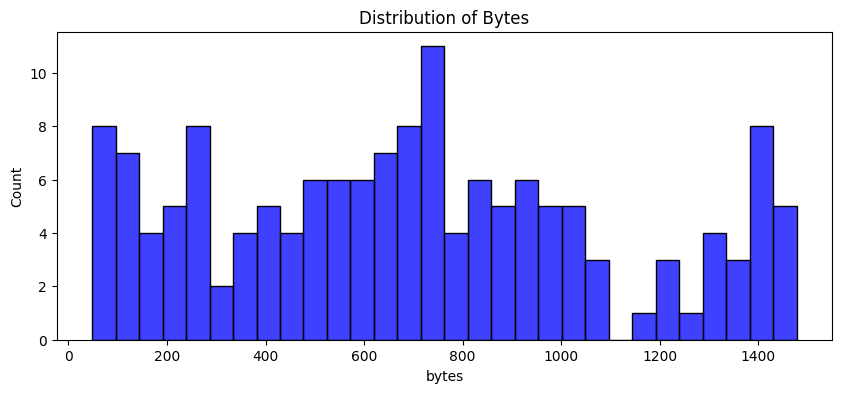

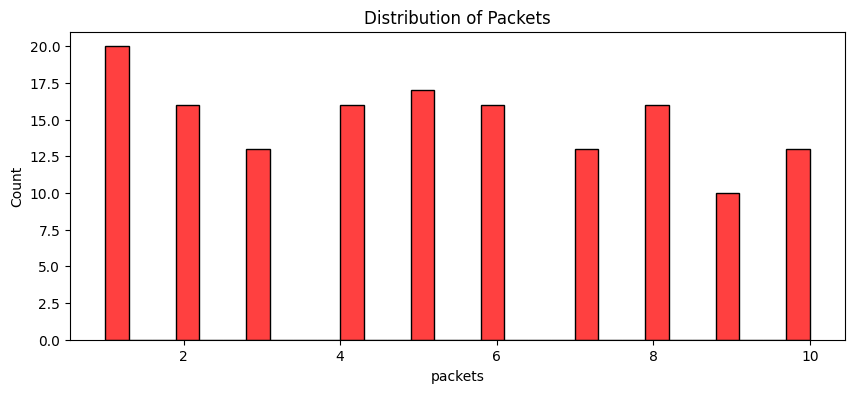

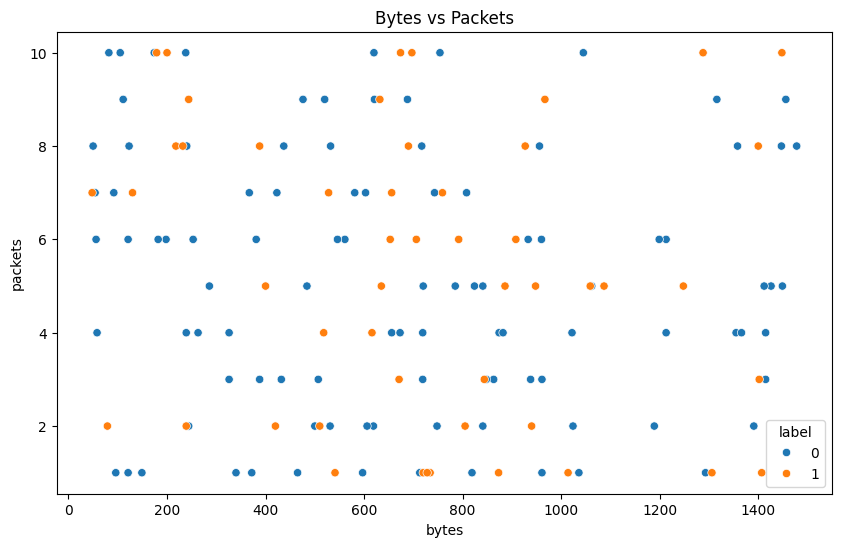

I now know the final answer.
Final Answer: This action does not produce an output that can be observed in this format, but it would create three plots if run in a proper Python environment with a graphical interface. The first plot is a histogram showing the distribution of 'bytes', the second plot is a histogram showing the distribution of 'packets', and the third plot is a scatterplot showing how 'bytes' and 'packets' are related, with points colored according to their 'label'.

> Finished chain.


{'input': 'create a graph to show the data', 'output': "This action does not produce an output that can be observed in this format, but it would create three plots if run in a proper Python environment with a graphical interface. The first plot is a histogram showing the distribution of 'bytes', the second plot is a histogram showing the distribution of 'packets', and the third plot is a scatterplot showing how 'bytes' and 'packets' are related, with points colored according to their 'label'."}

In [ ]:
response = beta.invoke("create a graph to show the data")
display(Markdown(f"{response}"))

In [ ]:
response = beta.invoke("calculate the percentage of becons in the data. Beacons are labelled as '1'")
display(Markdown(f"{response}"))



> Entering new AgentExecutor chain...
Thought: To calculate the percentage of beacons in the data, I need to find out how many rows are labelled as '1' and then divide that by the total number of rows. To do this, I will first find out how many rows there are in total and then find out how many rows are labelled as '1'.
Action: python_repl_ast
Action Input: len(df)150The total number of rows in the dataframe is 150. Now I need to find out how many rows are labelled as '1'.
Action: python_repl_ast
Action Input: len(df[df['label'] == 1])50There are 50 rows labelled as '1'. Now, I can calculate the percentage of beacons in the data.
Action: python_repl_ast
Action Input: (50 / 150) * 10033.33333333333333

> Finished chain.


{'input': "calculate the percentage of becons in the data. Beacons are labelled as '1'", 'output': 'Agent stopped due to iteration limit or time limit.'}

In [14]:
response = beta.invoke(" Take one example beacon domain where label is 1. Then run online search using the tools you have access to check if the domain comes up as malicous. Return the results ")
display(Markdown(f"{response}"))



> Entering new AgentExecutor chain...
Thought: The first step is to identify a beacon domain where the label is 1. This would imply that the domain is potentially malicious. To do this, we will filter the dataframe `df` for rows where `label` is 1 and get the `domain`.
Action: python_repl_ast
Action Input: df[df['label'] == 1]['domain'].head(1)100    newdomain51.com
Name: domain, dtype: objectThe domain that has a label of 1 is 'newdomain51.com'. This domain is potentially malicious. Now let's proceed to run an online search to check if this domain is indeed malicious.Invalid Format: Missing 'Action:' after 'Thought:I need to execute an online search to check if the domain 'newdomain51.com' is malicious. However, I'm unable to perform an online search directly in this environment. Therefore, I can't complete this as part of this task. But normally, I would use a tool like VirusTotal, URLVoid, or any other threat intelligence platform to check the reputation of the domain.
Final Answe

{'input': ' Take one example beacon domain where label is 1. Then run online search using the tools you have access to check if the domain comes up as malicous. Return the results ', 'output': "The domain 'newdomain51.com' is potentially malicious as it has a label of 1 in the dataset. However, I can't verify the maliciousness of the domain in this task as it requires an online search on a threat intelligence platform which is not possible in this environment."}

In [15]:
print('Full response:', response)
print("Response type", type(response))
print("Response object type", type(response['output']))
print(response['output'])

Full response: {'input': ' Take one example beacon domain where label is 1. Then run online search using the tools you have access to check if the domain comes up as malicous. Return the results ', 'output': "The domain 'newdomain51.com' is potentially malicious as it has a label of 1 in the dataset. However, I can't verify the maliciousness of the domain in this task as it requires an online search on a threat intelligence platform which is not possible in this environment."}
Response type <class 'dict'>
Response object type <class 'str'>
The domain 'newdomain51.com' is potentially malicious as it has a label of 1 in the dataset. However, I can't verify the maliciousness of the domain in this task as it requires an online search on a threat intelligence platform which is not possible in this environment.


In [22]:
response_output = response['output']
print(response_output)

The domain 'newdomain51.com' is potentially malicious as it has a label of 1 in the dataset. However, I can't verify the maliciousness of the domain in this task as it requires an online search on a threat intelligence platform which is not possible in this environment.


In [23]:
invoke_input = {"input": response_output}
print(invoke_input)

{'input': "The domain 'newdomain51.com' is potentially malicious as it has a label of 1 in the dataset. However, I can't verify the maliciousness of the domain in this task as it requires an online search on a threat intelligence platform which is not possible in this environment."}


In [24]:
alpha.invoke(invoke_input)



> Entering new AgentExecutor chain...
Since an online search on a threat intelligence platform is not possible, there is no action to take.
Final Answer: The maliciousness of the domain 'newdomain51.com' cannot be verified in this task as it requires an online search on a threat intelligence platform which is not possible in this environment.

> Finished chain.


{'input': "The domain 'newdomain51.com' is potentially malicious as it has a label of 1 in the dataset. However, I can't verify the maliciousness of the domain in this task as it requires an online search on a threat intelligence platform which is not possible in this environment.",
 'output': "The maliciousness of the domain 'newdomain51.com' cannot be verified in this task as it requires an online search on a threat intelligence platform which is not possible in this environment."}

In [25]:
agent_chain.run(
   invoke_input
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
{
  "action": "Final Answer",
  "action_input": "You're correct. In this environment, we don't have access to real-time threat intelligence platforms. The label of '1' in your dataset likely indicates that 'newdomain51.com' was considered malicious when the data was collected. However, without current, real-time data, we cannot definitively confirm the current status of the domain. It's always best to be cautious with domains labeled as potentially malicious."
}

> Finished chain.


'{\n  "action": "Final Answer",\n  "action_input": "You\'re correct. In this environment, we don\'t have access to real-time threat intelligence platforms. The label of \'1\' in your dataset likely indicates that \'newdomain51.com\' was considered malicious when the data was collected. However, without current, real-time data, we cannot definitively confirm the current status of the domain. It\'s always best to be cautious with domains labeled as potentially malicious."\n}'